In [2]:
# Emacs Transient Mode: SPC m .

In [1]:
# Hearth Disease prediction Dataset
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import matplotlib as plt
import matplotlib.pyplot as pyp

import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier


2025-12-30 18:48:05.882341: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-30 18:48:06.299893: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-12-30 18:48:08.516115: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
#Hilfvariablen

# Hilfsfunktionen
def print_mappings(lcs):
    mappings = {}
    for col, lc in lcs.items():
        mappings[col] = dict(zip(lc.classes_, range(len(lc.classes_))))

    for col, mapping in mappings.items():
        print(f"\nMapping für {col}:")
        for k, v in mapping.items():
            print(f"{k} -> {v}")

def plot_evaluation(model):
    test_loss, test_acc = model.evaluate(feature_test, target_test)
    print(f"Test Accuarcy: {test_acc:.3f} Test Loss: {test_loss:.3f}")

    pyp.plot(history.history["loss"], label="Training Loss")
    pyp.plot(history.history["val_loss"], label="Val Loss")
    pyp.legend()
    pyp.show()



In [3]:
#Hearth Disease prediction Dataset from https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
df = pd.read_csv(
    "/home/YBolleininger/Documents/#Fachhochschule/WiSe - 25_26/Maschine Learning/Hausarbeit/Assets/heart.csv",
    sep=",",
    header=0,
    encoding="utf-8"
    )
print("Info:\n", df.info())


<class 'pandas.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    str    
 2   ChestPainType   918 non-null    str    
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    str    
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    str    
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    str    
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), str(5)
memory usage: 86.2 KB
Info:
 None


In [4]:
#Preprocessing
#Mapping der nicht-numerischen werte

lcs = {}
for col in df.select_dtypes(include=["object"]).columns:
    lc = LabelEncoder()
    df[col] = lc.fit_transform(df[col])
    lcs[col] = lc
print_mappings(lcs)


Mapping für Sex:
F -> 0
M -> 1

Mapping für ChestPainType:
ASY -> 0
ATA -> 1
NAP -> 2
TA -> 3

Mapping für RestingECG:
LVH -> 0
Normal -> 1
ST -> 2

Mapping für ExerciseAngina:
N -> 0
Y -> 1

Mapping für ST_Slope:
Down -> 0
Flat -> 1
Up -> 2


Text(0, 0.5, 'Datenpunkte')

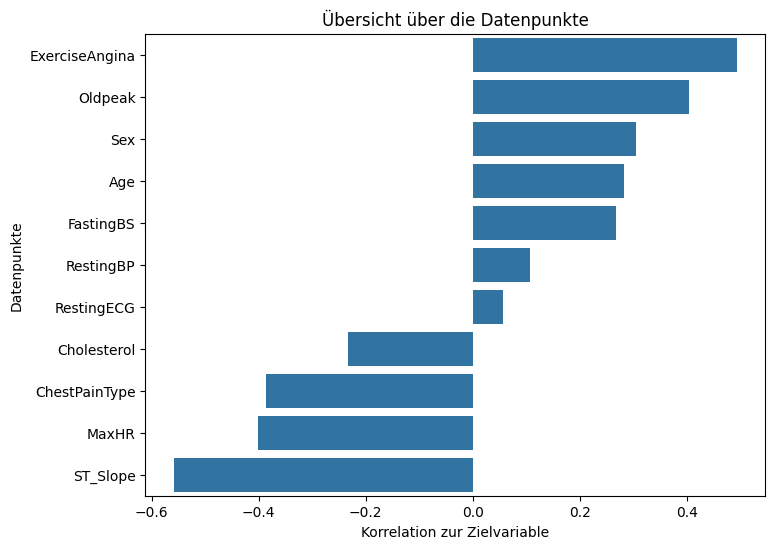

In [5]:
#Korrelation zur Zielvariable
corr_to_target = df.corr()["HeartDisease"].sort_values(ascending=False)
corr_features = corr_to_target.index.drop("HeartDisease")
corr_values = corr_to_target.drop("HeartDisease")

pyp.figure(figsize=(8,6))
sns.barplot(x=corr_values, y=corr_features)
pyp.title("Übersicht über die Datenpunkte")
pyp.xlabel("Korrelation zur Zielvariable")
pyp.ylabel("Datenpunkte")



In [6]:
#Preprocessing
#Normierung

scaler = MinMaxScaler()

feature_df = df.drop("HeartDisease", axis=1)
feature_scaled = scaler.fit_transform(feature_df)
target_df = df["HeartDisease"]

feature_scaled_df = pd.DataFrame(feature_scaled, columns = feature_df.columns, index = feature_df.index)
target_scaled_df = target_df #Binär -> Normierung nicht nötig

In [7]:
#Daten Teilen
feature_train, feature_test, target_train, target_test = train_test_split(
                                                                        feature_scaled_df,
                                                                        target_scaled_df,
                                                                        test_size=0.2,
                                                                        random_state=42
                                                                        )

In [8]:
#TensorFlow Model setup
#Ohne GridSearch
tf.random.set_seed(42)

#Layer
l_input = tf.keras.layers.Input(shape=(11,))

l_1 = tf.keras.layers.Dense(16, activation="relu")(l_input)
l_2 = tf.keras.layers.Dense(8, activation="relu")(l_1)

l_ouput = tf.keras.layers.Dense(1, activation="sigmoid")(l_2)

model = tf.keras.models.Model(
                            inputs=l_input,
                            outputs=l_ouput
)

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    feature_train,
    target_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50


2025-12-30 18:48:28.724204: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


 1/19 ━━━━━━━━━━━━━━━━━━━━ 17s 996ms/step - accuracy: 0.5625 - loss: 0.6495

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5111 - loss: 0.6651 - val_accuracy: 0.6463 - val_loss: 0.6417


Epoch 2/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7188 - loss: 0.6180

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6405 - loss: 0.6368 - val_accuracy: 0.7415 - val_loss: 0.6204


Epoch 3/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7812 - loss: 0.5916

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7376 - loss: 0.6138 - val_accuracy: 0.7619 - val_loss: 0.5983


Epoch 4/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7812 - loss: 0.5648

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7768 - loss: 0.5893 - val_accuracy: 0.7755 - val_loss: 0.5759


Epoch 5/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8125 - loss: 0.5354

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7853 - loss: 0.5630 - val_accuracy: 0.7891 - val_loss: 0.5524


Epoch 6/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8125 - loss: 0.5025

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7990 - loss: 0.5353 - val_accuracy: 0.8095 - val_loss: 0.5293


Epoch 7/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8438 - loss: 0.4689

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8160 - loss: 0.5068 - val_accuracy: 0.8367 - val_loss: 0.5054


Epoch 8/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8750 - loss: 0.4354

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8262 - loss: 0.4771 - val_accuracy: 0.8367 - val_loss: 0.4775


Epoch 9/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8438 - loss: 0.4025

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8330 - loss: 0.4467 - val_accuracy: 0.8367 - val_loss: 0.4536


Epoch 10/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8438 - loss: 0.3729

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8382 - loss: 0.4190 - val_accuracy: 0.8367 - val_loss: 0.4382


Epoch 11/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8438 - loss: 0.3440

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8330 - loss: 0.3985 - val_accuracy: 0.8299 - val_loss: 0.4303


Epoch 12/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8438 - loss: 0.3195

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8382 - loss: 0.3851 - val_accuracy: 0.8367 - val_loss: 0.4270


Epoch 13/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8438 - loss: 0.3017

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8399 - loss: 0.3765 - val_accuracy: 0.8367 - val_loss: 0.4252


Epoch 14/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8438 - loss: 0.2891

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8433 - loss: 0.3705 - val_accuracy: 0.8367 - val_loss: 0.4245


Epoch 15/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8438 - loss: 0.2815

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8450 - loss: 0.3660 - val_accuracy: 0.8367 - val_loss: 0.4236


Epoch 16/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8750 - loss: 0.2763

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8467 - loss: 0.3624 - val_accuracy: 0.8299 - val_loss: 0.4220


Epoch 17/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 0.2717

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8484 - loss: 0.3595 - val_accuracy: 0.8299 - val_loss: 0.4210


Epoch 18/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9062 - loss: 0.2690

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8501 - loss: 0.3569 - val_accuracy: 0.8299 - val_loss: 0.4205


Epoch 19/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9062 - loss: 0.2676

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8535 - loss: 0.3546 - val_accuracy: 0.8299 - val_loss: 0.4204


Epoch 20/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9062 - loss: 0.2666

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8535 - loss: 0.3528 - val_accuracy: 0.8299 - val_loss: 0.4201


Epoch 21/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 0.2654

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8535 - loss: 0.3512 - val_accuracy: 0.8299 - val_loss: 0.4199


Epoch 22/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9062 - loss: 0.2642

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - loss: 0.3497 - val_accuracy: 0.8367 - val_loss: 0.4196


Epoch 23/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 0.2633

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - loss: 0.3484 - val_accuracy: 0.8367 - val_loss: 0.4193


Epoch 24/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9062 - loss: 0.2626

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8535 - loss: 0.3472 - val_accuracy: 0.8367 - val_loss: 0.4185


Epoch 25/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9062 - loss: 0.2619

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8535 - loss: 0.3460 - val_accuracy: 0.8367 - val_loss: 0.4181


Epoch 26/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 0.2616

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8518 - loss: 0.3450 - val_accuracy: 0.8367 - val_loss: 0.4179


Epoch 27/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9062 - loss: 0.2613

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8535 - loss: 0.3440 - val_accuracy: 0.8367 - val_loss: 0.4177


Epoch 28/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 0.2608

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8518 - loss: 0.3432 - val_accuracy: 0.8367 - val_loss: 0.4177


Epoch 29/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 0.2605

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8518 - loss: 0.3423 - val_accuracy: 0.8367 - val_loss: 0.4174


Epoch 30/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9062 - loss: 0.2601

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - loss: 0.3416 - val_accuracy: 0.8367 - val_loss: 0.4171


Epoch 31/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9062 - loss: 0.2596

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - loss: 0.3408 - val_accuracy: 0.8367 - val_loss: 0.4167


Epoch 32/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9062 - loss: 0.2594

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8552 - loss: 0.3402 - val_accuracy: 0.8299 - val_loss: 0.4166


Epoch 33/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9062 - loss: 0.2593

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - loss: 0.3395 - val_accuracy: 0.8299 - val_loss: 0.4162


Epoch 34/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9062 - loss: 0.2591

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - loss: 0.3388 - val_accuracy: 0.8299 - val_loss: 0.4160


Epoch 35/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9062 - loss: 0.2591

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8552 - loss: 0.3382 - val_accuracy: 0.8299 - val_loss: 0.4156


Epoch 36/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9062 - loss: 0.2586

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - loss: 0.3376 - val_accuracy: 0.8299 - val_loss: 0.4153


Epoch 37/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 0.2582

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - loss: 0.3371 - val_accuracy: 0.8299 - val_loss: 0.4149


Epoch 38/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9062 - loss: 0.2578

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - loss: 0.3366 - val_accuracy: 0.8299 - val_loss: 0.4145


Epoch 39/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9062 - loss: 0.2573

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8552 - loss: 0.3361 - val_accuracy: 0.8299 - val_loss: 0.4141


Epoch 40/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9062 - loss: 0.2569

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8569 - loss: 0.3356 - val_accuracy: 0.8299 - val_loss: 0.4138


Epoch 41/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9062 - loss: 0.2565

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8586 - loss: 0.3351 - val_accuracy: 0.8299 - val_loss: 0.4134


Epoch 42/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9062 - loss: 0.2561

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8603 - loss: 0.3347 - val_accuracy: 0.8367 - val_loss: 0.4128


Epoch 43/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 0.2557

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8603 - loss: 0.3342 - val_accuracy: 0.8435 - val_loss: 0.4125


Epoch 44/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9062 - loss: 0.2552

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8603 - loss: 0.3337 - val_accuracy: 0.8435 - val_loss: 0.4124


Epoch 45/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 0.2550

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8603 - loss: 0.3332 - val_accuracy: 0.8435 - val_loss: 0.4120


Epoch 46/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9062 - loss: 0.2544

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8603 - loss: 0.3327 - val_accuracy: 0.8435 - val_loss: 0.4115


Epoch 47/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 0.2538

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8620 - loss: 0.3323 - val_accuracy: 0.8435 - val_loss: 0.4111


Epoch 48/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9062 - loss: 0.2531

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8620 - loss: 0.3318 - val_accuracy: 0.8435 - val_loss: 0.4106


Epoch 49/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 0.2526

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8620 - loss: 0.3315 - val_accuracy: 0.8435 - val_loss: 0.4104


Epoch 50/50


 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9062 - loss: 0.2523

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8637 - loss: 0.3310 - val_accuracy: 0.8503 - val_loss: 0.4098


In [ ]:
#Training mit Grid Search
#Epochs und batch size für Optimierung heraus genommen

grid = {
    "hidden_layers": [1,2,3],
    "neurons": [8,16,32],
    "dropout_rate": [0.0, 0.2, 0.3],
    "optimizer": ["adam", "sgd"],
    "hidden_activation": ["relu", "tanh","sigmoid"],
}

def create_model(hidden_layers, neurons, dropout_rate=0.0, optimizer="adam", hidden_activation="relu"):
    model = Sequential()

    for _ in range(hidden_layers):
        if _ == 0:
            model.add(Dense(neurons, input_shape=(11,), activation="relu"))

        else:
            model.add(Dense(neurons, activation=hidden_activation))
            if dropout_rate > 0:
                model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

KC = KerasClassifier(build_fn=create_model, verbose=0, dropout_rate=0.0, hidden_activation="relu",
                     hidden_layers=1, neurons=8)

grid = GridSearchCV(estimator=KC, param_grid=grid, cv=3, scoring="accuracy")

grid_result = grid.fit(feature_train, target_train)
best_params = grid_result.best_params_

print("Beste Parameter:", best_params)
print("Beste Accuracy:", grid_result.best_score_)


model = create_model(
    hidden_layers = best_params["hidden_layer"],
    neurons = best_params["neurons"],
    dropout_rate = best_params["dropout_rate"],
    optimizer = best_params["optimizer"],
    hidden_activation = best_params["activation"]
)

history = model.fit(
    feature_train, target_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

plot_evaluation(history)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/home/YBolleininger/.local/lib/python3.13/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/YBolleininger/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
